In [1]:
import numpy as np
from pathlib import Path
from utils import simulation2d as project
from flowrec.data import data_partition, shuffle_with_idx
from matplotlib import pyplot as plt

In [9]:
x_base = 132
data_dir = Path('./local_data/re200')
(ux,uy,pp) = project.read_data(data_dir,x_base)
x = np.stack([ux,uy,pp],axis=0)
[x_train,x_val,x_test], [xm_train,xm_val,xm_test],idx_shuffle = data_partition(x,1,[842,100,100],REMOVE_MEAN=True,randseed=100)

In [10]:
x.shape

(3, 1042, 381, 129)

In [12]:
idx_shuffle2, idx_unshuffle = shuffle_with_idx(842+100+100,np.random.default_rng(100))


In [13]:
[ux_train,uy_train,pp_train] = np.squeeze(np.split(x_train,3,axis=0))
[ux_val,uy_val,pp_val] = np.squeeze(np.split(x_val,3,axis=0))
[ux_test,uy_test,pp_test] = np.squeeze(np.split(x_test,3,axis=0))
# pb_train = project.take_measurement_base(pp_train,ly=triangle_base_coords,centrex=0)
# pb_val = project.take_measurement_base(pp_val,ly=triangle_base_coords,centrex=0)
# pb_test = project.take_measurement_base(pp_test,ly=triangle_base_coords,centrex=0)
(ntrain,nx,ny) = ux_train.shape
[ux_train_m,uy_train_m,pp_train_m] = np.squeeze(np.split(xm_train,3,axis=0))
[ux_val_m,uy_val_m,pp_val_m] = np.squeeze(np.split(xm_val,3,axis=0))
[ux_test_m,uy_test_m,pp_test_m] = np.squeeze(np.split(xm_test,3,axis=0))

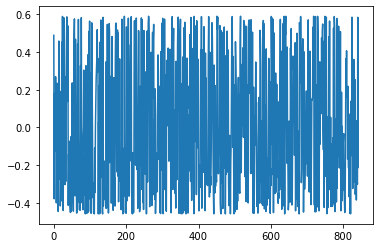

In [14]:
fig = plt.figure()
plt.plot(ux_train[:,100,100])
plt.show()

In [15]:
ux_all = np.vstack((ux_train+ux_train_m, ux_val+ux_val_m, ux_test+ux_test_m))
_, idx_unshuffle = shuffle_with_idx(ux_all.shape[0],np.random.default_rng(100))
ux_all = ux_all[idx_unshuffle,:,:]

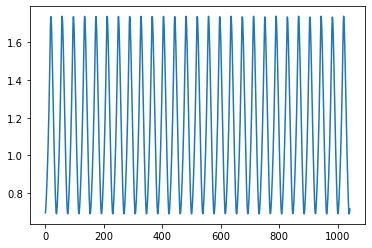

In [16]:
fig = plt.figure()
plt.plot(ux_all[:,100,100])
plt.show()